In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir()

['1.jpg',
 'archive',
 'Documentation',
 'Js models',
 'JSconversion.ipynb',
 'Model',
 'model Script.ipynb',
 'models',
 'Normalize image.py',
 'pngwing.com.png',
 'Web']

In [3]:
train_real_dir=os.path.join('./archive/train/REAL')
train_fake_dir=os.path.join('./archive/train/FAKE')

test_real_dir=os.path.join('./archive/test/REAL')
test_fake_dir=os.path.join('./archive/test/FAKE')

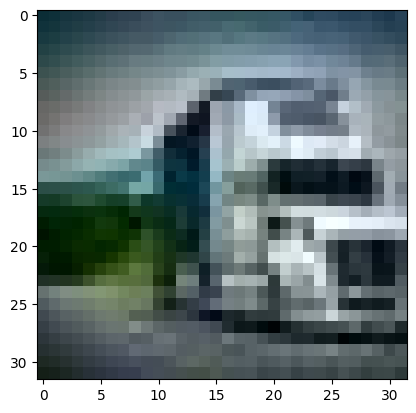

In [4]:
import cv2
img=cv2.imread('./archive/test/FAKE/0 (10).jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
plt.imshow(image_rgb)
plt.show()

In [5]:
print(len(os.listdir(train_fake_dir)))

50000


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
trainDataGen=ImageDataGenerator(rescale=1/255)
testDataGen=ImageDataGenerator(rescale=1/255)

In [8]:
trainGen=trainDataGen.flow_from_directory('./archive/train/',target_size=(32, 32),
        batch_size=128,
        class_mode='binary')

Found 100000 images belonging to 2 classes.


In [9]:
testGen=testDataGen.flow_from_directory('./archive/test/',target_size=(32, 32),
        batch_size=128,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [10]:
model=tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(32, (4, 4), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(16, (4, 4), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 16)          8208      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0

In [14]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
h = model.fit(trainGen, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
782/782 [==============================] - 1119s 1s/step - loss: 0.4680 - accuracy: 0.7719
Epoch 2/20
782/782 [==============================] - 927s 1s/step - loss: 0.3515 - accuracy: 0.8491
Epoch 3/20
782/782 [==============================] - 162s 207ms/step - loss: 0.3044 - accuracy: 0.8716
Epoch 4/20
782/782 [==============================] - 80s 102ms/step - loss: 0.2701 - accuracy: 0.8884
Epoch 5/20
782/782 [==============================] - 80s 102ms/step - loss: 0.2474 - accuracy: 0.9001
Epoch 6/20
782/782 [==============================] - 80s 103ms/step - loss: 0.2324 - accuracy: 0.9058
Epoch 7/20
782/782 [==============================] - 81s 103ms/step - loss: 0.2199 - accuracy: 0.9111
Epoch 8/20
782/782 [==============================] - 81s 103ms/step - loss: 0.2138 - accuracy: 0.9141
Epoch 9/20
782/782 [==============================] - 85s 108ms/step - loss: 0.2016 - accuracy: 0.9194
Epoch 10/20
782/782 [==============================] - 81s 104ms/step - los

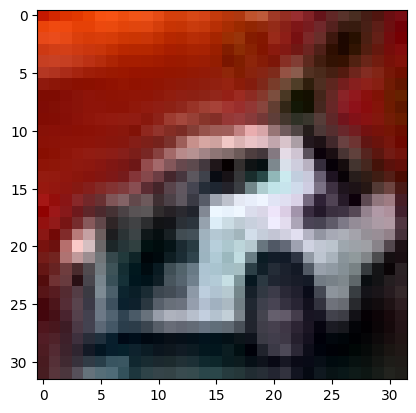

In [16]:
img=cv2.imread('./archive/test/REAL/0000 (2).jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
model=tf.keras.models.load_model('./Model/model10.h5')

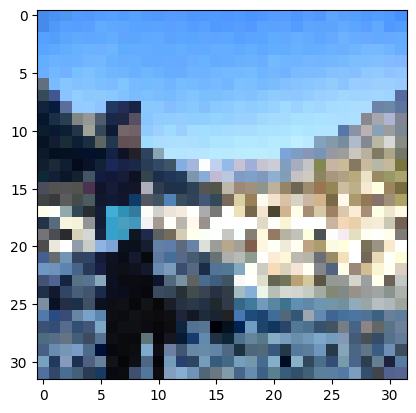

In [15]:
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('./sky.jpg',target_size=(32,32))
plt.imshow(img)

In [16]:
img=img_to_array(img)

In [17]:

score = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 58ms/step


In [18]:
if(score>0.5):
    print("Real")
else:
    print('fake')
print(score)


fake
[[0.00225022]]


In [34]:
model.save('./Model/model10.h5')

In [35]:
model=tf.keras.models.load_model('./Model')

In [201]:
score=loaded_model.predict(x)[0][0]
score

1/1 [==============================] - 0s 65ms/step


0.31056586